In [1]:
import pandas as pd
import json

In [2]:
with open('data.jsonl', 'r') as f:
    data = [json.loads(line) for line in f]

data = pd.DataFrame(data)
data

,text,label
0,i feel awful about it too because it s my job ...,0
1,im alone i feel awful,0
2,ive probably mentioned this before but i reall...,1
3,i was feeling a little low few days back,0
4,i beleive that i am much more sensitive to oth...,2
...,...,...
416804,that was what i felt when i was finally accept...,1
416805,i take every day as it comes i m just focussin...,4
416806,i just suddenly feel that everything was fake,0
416807,im feeling more eager than ever to claw back w...,1


In [3]:
data.duplicated().sum()

686

In [4]:
data = data.drop_duplicates()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 416123 entries, 0 to 416808
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    416123 non-null  object
 1   label   416123 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 9.5+ MB


In [6]:
class_names = ["sadness", "joy", "love", "anger", "fear", "surprise"]

data['emotion'] = data['label'].map(lambda x: class_names[x])
data

C:\Users\hifri\AppData\Local\Temp\ipykernel_10548\2998634954.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['emotion'] = data['label'].map(lambda x: class_names[x])


,text,label,emotion
0,i feel awful about it too because it s my job ...,0,sadness
1,im alone i feel awful,0,sadness
2,ive probably mentioned this before but i reall...,1,joy
3,i was feeling a little low few days back,0,sadness
4,i beleive that i am much more sensitive to oth...,2,love
...,...,...,...
416804,that was what i felt when i was finally accept...,1,joy
416805,i take every day as it comes i m just focussin...,4,fear
416806,i just suddenly feel that everything was fake,0,sadness
416807,im feeling more eager than ever to claw back w...,1,joy


In [7]:
for label in data['label'].unique():
    examples = data[data['label'] == label]
    print(f"Examples for label {label} ({class_names[label]}):")
    print(examples['emotion'].unique())
    print()


Examples for label 0 (sadness):
['sadness']

Examples for label 1 (joy):
['joy']

Examples for label 2 (love):
['love']

Examples for label 3 (anger):
['anger']

Examples for label 4 (fear):
['fear']

Examples for label 5 (surprise):
['surprise']



In [8]:
sadness_data = data[data['emotion'] == 'sadness']

In [9]:
joy_data = data[data['emotion'] == 'joy']

In [10]:
fear_data = data[data['emotion'] == 'fear']

In [11]:
love_data = data[data['emotion'] == 'love']

In [12]:
anger_data = data[data['emotion'] == 'anger']

In [13]:
surprise_data = data[data['emotion'] == 'surprise']

In [14]:
sadness_data15 = sadness_data.sample(n=15000, random_state=42)
joy_data15 = joy_data.sample(n=15000, random_state=42)
fear_data15 = fear_data.sample(n=15000, random_state=42)
love_data15 = love_data.sample(n=15000, random_state=42)
anger_data15 = anger_data.sample(n=15000, random_state=42)


In [15]:

combined_df = pd.concat([sadness_data15, joy_data15, fear_data15, love_data15, anger_data15, surprise_data], ignore_index=True)

shuffled_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)
shuffled_df

,text,label,emotion
0,i feel paranoid and withdraw into myself,4,fear
1,i dont know why i feel so unsure of myself con...,4,fear
2,i feel like a martyr it is usually because i a...,3,anger
3,i dont hate mud but i have a feeling after tha...,1,joy
4,when i saw a scene on tv where a castration wa...,3,anger
...,...,...,...
89954,i am feeling unsuccessful in this world,0,sadness
89955,i can line up the people who back through the ...,2,love
89956,i have never experienced higher traffic on my ...,5,surprise
89957,ive been taking naps because i would feel so d...,0,sadness


In [16]:
from sklearn.model_selection import train_test_split


In [17]:
text = shuffled_df['text']
label = shuffled_df['label']

data_train_text, data_temp_text, data_train_label, data_temp_label = train_test_split(text, label, test_size=0.2, random_state=42)
data_test_text, data_val_text, data_test_label, data_val_label = train_test_split(data_temp_text, data_temp_label, test_size=0.5, random_state=42)

train_data = pd.DataFrame({'text': data_train_text, 'label': data_train_label})
val_data = pd.DataFrame({'text': data_val_text, 'label': data_val_label})
test_data = pd.DataFrame({'text': data_test_text, 'label': data_test_label}) 
train_data.shape, val_data.shape, test_data.shape


((71967, 2), (8996, 2), (8996, 2))

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [11]:



'''tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['text'])
word_counts = tokenizer.word_counts
print(word_counts) 
words_above_10 = {word: count for word, count in word_counts.items() if count > 10}

print(f"Jumlah kata yang kemunculannya di atas 10: {len(words_above_10)}")

# Visualisasi frekuensi kata
word_freqs = list(word_counts.values())
plt.hist(word_freqs, bins=10)
plt.title("Distribusi Frekuensi Kata")
plt.xlabel("Frekuensi")
plt.ylabel("Jumlah Kata")
plt.show()
'''

'tokenizer = Tokenizer()\ntokenizer.fit_on_texts(data[\'text\'])\nword_counts = tokenizer.word_counts\nprint(word_counts) \nwords_above_10 = {word: count for word, count in word_counts.items() if count > 10}\n\nprint(f"Jumlah kata yang kemunculannya di atas 10: {len(words_above_10)}")\n\n# Visualisasi frekuensi kata\nword_freqs = list(word_counts.values())\nplt.hist(word_freqs, bins=10)\nplt.title("Distribusi Frekuensi Kata")\nplt.xlabel("Frekuensi")\nplt.ylabel("Jumlah Kata")\nplt.show()\n'

In [24]:
#from sklearn.calibration import LabelEncoder
#from keras.utils import to_categorical


vocab_size = 14500
embedding_dim = 16
max_length = 32

trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

tokenizer.fit_on_texts(train_data['text'].values)
word_index = tokenizer.word_index

#train_padding
training_sequences_text = tokenizer.texts_to_sequences(train_data['text'].values)
training_padded_text = pad_sequences(training_sequences_text, maxlen=max_length, padding=padding_type, truncating=trunc_type)

#val padding
validation_sequences = tokenizer.texts_to_sequences(val_data['text'].values)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert labels to one-hot encoded format
num_classes = len(train_data['label'].unique())  # Use parentheses to call the method

train_labels = tf.keras.utils.to_categorical(train_data['label'].values, num_classes=num_classes)
val_labels = tf.keras.utils.to_categorical(val_data['label'].values, num_classes=num_classes)


In [28]:
training_padded_text.shape, validation_padded.shape, train_labels.shape, val_labels.shapet

((71967, 32), (8996, 32), (71967, 6), (8996, 6))

In [25]:
import tensorflow as tf

In [41]:

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(max_length,)),
    #tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    #tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True, dropout=0.3)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, dropout=0.3)),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    #tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax),
    
    
    #tf.keras.layers.SpatialDropout1D(0.2),
    #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    #tf.keras.layers.GlobalAveragePooling1D(),
    #tf.keras.layers.Dense(64, activation='relu'),
    #tf.keras.layers.Dense(6, activation='softmax')  # Output layer for classification
])


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
#model.build(input_shape=(None, max_length))  # Batch size is None
model.summary()




Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_17 (Embedding)        │ (None, 32, 16)         │       232,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_30                │ (None, 32, 256)        │       148,480 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_31                │ (None, 128)            │       164,352 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 549,158 (2.09 MB)

 Trainable params: 549,158 (2.09 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Train the model with the dense one-hot encoded labels
history = model.fit(
    training_padded_text, train_labels,
    epochs=10,
    validation_data=(validation_padded, val_labels),
    batch_size=32,
    verbose=2
)


Epoch 1/10
2249/2249 - 53s - 23ms/step - accuracy: 0.7399 - loss: 0.7057 - val_accuracy: 0.8894 - val_loss: 0.3627
Epoch 2/10
2249/2249 - 54s - 24ms/step - accuracy: 0.8919 - loss: 0.3518 - val_accuracy: 0.9062 - val_loss: 0.2753
Epoch 3/10
2249/2249 - 58s - 26ms/step - accuracy: 0.9130 - loss: 0.2560 - val_accuracy: 0.9244 - val_loss: 0.2081
Epoch 4/10
2249/2249 - 59s - 26ms/step - accuracy: 0.9266 - loss: 0.2014 - val_accuracy: 0.9243 - val_loss: 0.1947
Epoch 5/10
2249/2249 - 59s - 26ms/step - accuracy: 0.9331 - loss: 0.1814 - val_accuracy: 0.9312 - val_loss: 0.1823
Epoch 6/10
2249/2249 - 58s - 26ms/step - accuracy: 0.9368 - loss: 0.1656 - val_accuracy: 0.9297 - val_loss: 0.1830
Epoch 7/10
2249/2249 - 58s - 26ms/step - accuracy: 0.9394 - loss: 0.1554 - val_accuracy: 0.9276 - val_loss: 0.1864
Epoch 8/10
2249/2249 - 55s - 25ms/step - accuracy: 0.9422 - loss: 0.1464 - val_accuracy: 0.9290 - val_loss: 0.1959
Epoch 9/10
2249/2249 - 50s - 22ms/step - accuracy: 0.9454 - loss: 0.1378 - val_a

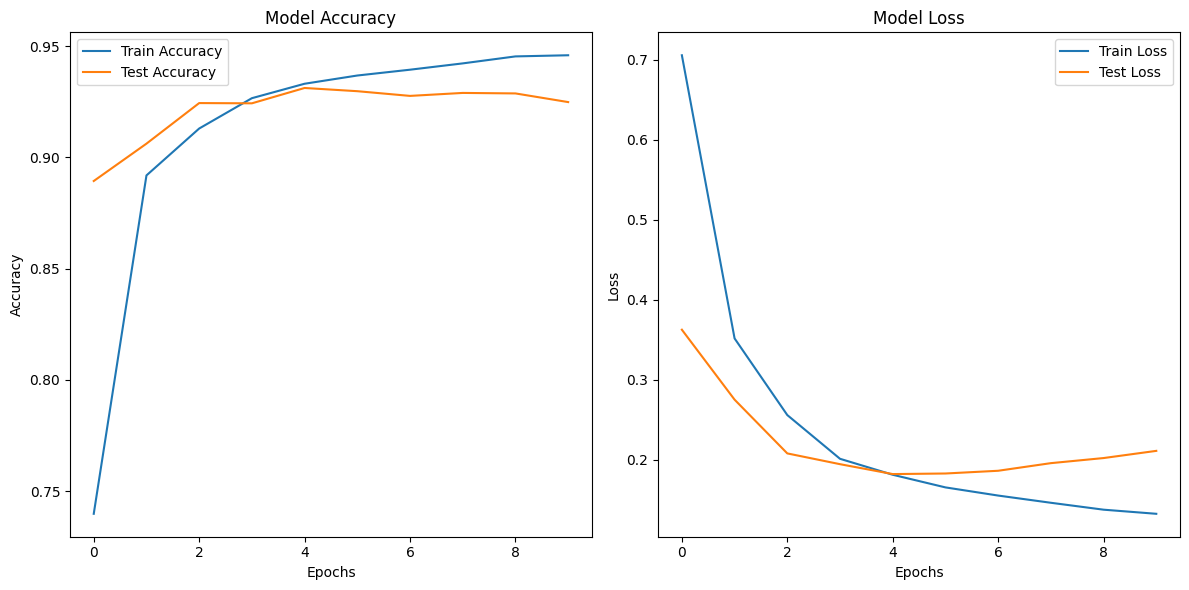

In [43]:
import matplotlib.pyplot as plt
# Plotting the training & validation accuracy and loss
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [49]:
import numpy as np
import pandas as pd
import tensorflow as tf

def predict_text_batch_and_update_df(df, model, tokenizer, max_seq_length, class_names):
    # Convert texts to sequences
    texts = df['text'].values
    sequences = tokenizer.texts_to_sequences(texts)
    padded_sequences = pad_sequences(sequences, maxlen=max_seq_length)
    
    # Predict and get probabilities
    predictions = model.predict(padded_sequences)
    label_indices = np.argmax(predictions, axis=1)
    probabilities = np.max(predictions, axis=1)
    
    # Map predicted indices to emotion labels
    predicted_labels = [class_names[idx] for idx in label_indices]
    
    # Update the DataFrame
    df['predicted_emotion'] = predicted_labels
    df['prediction_probability'] = probabilities
    
    return df

# Example usage
# Define your class names
class_names = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']  # Adjust to your dataset's labels
updated_test_df = predict_text_batch_and_update_df(test_data, model, tokenizer, max_length, class_names)



282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [48]:
for label in data['label'].unique():
    examples = data[data['label'] == label]
    print(f"Examples for label {label} ({class_names[label]}):")
    print(examples['emotion'].unique())
    print()


Examples for label 0 (happy):
['sadness']

Examples for label 1 (sad):
['joy']

Examples for label 2 (angry):
['love']

Examples for label 3 (fear):
['anger']

Examples for label 4 (surprise):
['fear']

Examples for label 5 (neutral):
['surprise']



In [50]:
updated_test_df.head(10)  # Adjust the number of rows as needed

,text,label,predicted_emotion,prediction_probability
45361,i cannot communicate to her and convey my cong...,0,sadness,0.899796
54069,i have started off with a quick paced non stop...,5,surprise,0.860389
16370,i feel paranoid about this you havent talked t...,4,fear,0.976968
65675,i can understand why i feel so restless but i ...,4,fear,0.984821
28877,i feel so isolated here,0,fear,0.807180
45616,im feeling a little less stressed and anxious ...,0,anger,0.614285
3007,i is feeling all triumphant after her big speech,1,joy,0.805878
2540,i am not so na ve that i can t tell what are s...,3,anger,0.983926
68141,i feel frightened too,4,fear,0.984173
74373,im leaning towards believing that some amount ...,3,anger,0.997693


In [51]:
updated_test_df['emotion'] = updated_test_df['label'].map(lambda x: class_names[x])
updated_test_df

,text,label,predicted_emotion,prediction_probability,emotion
45361,i cannot communicate to her and convey my cong...,0,sadness,0.899796,sadness
54069,i have started off with a quick paced non stop...,5,surprise,0.860389,surprise
16370,i feel paranoid about this you havent talked t...,4,fear,0.976968,fear
65675,i can understand why i feel so restless but i ...,4,fear,0.984821,fear
28877,i feel so isolated here,0,fear,0.807180,sadness
...,...,...,...,...,...
74783,i feel strange sick maybe no not sick i ve fel...,5,surprise,0.575768,surprise
37417,i started to feel weird mid back pain,5,fear,0.579875,surprise
6144,ive just realized that i feel no anxiety whats...,5,surprise,0.572508,surprise
10121,i do not get the feeling that she is much impr...,5,surprise,0.990606,surprise


In [52]:

matches_df = updated_test_df[updated_test_df['predicted_emotion'] == updated_test_df['emotion']]

# Create a DataFrame for mismatches
mismatches_df = updated_test_df[updated_test_df['predicted_emotion'] != updated_test_df['emotion']]



In [53]:
matches_df

,text,label,predicted_emotion,prediction_probability,emotion
45361,i cannot communicate to her and convey my cong...,0,sadness,0.899796,sadness
54069,i have started off with a quick paced non stop...,5,surprise,0.860389,surprise
16370,i feel paranoid about this you havent talked t...,4,fear,0.976968,fear
65675,i can understand why i feel so restless but i ...,4,fear,0.984821,fear
3007,i is feeling all triumphant after her big speech,1,joy,0.805878,joy
...,...,...,...,...,...
47998,i feel like this is my only chance to be accep...,2,love,0.798312,love
74783,i feel strange sick maybe no not sick i ve fel...,5,surprise,0.575768,surprise
6144,ive just realized that i feel no anxiety whats...,5,surprise,0.572508,surprise
10121,i do not get the feeling that she is much impr...,5,surprise,0.990606,surprise


In [54]:
mismatches_df

,text,label,predicted_emotion,prediction_probability,emotion
28877,i feel so isolated here,0,fear,0.807180,sadness
45616,im feeling a little less stressed and anxious ...,0,anger,0.614285,sadness
32325,i feel sorry about it,0,fear,0.803570,sadness
63517,i feel disgusted everytime a man smiles at me,3,fear,0.533031,anger
72457,i feel overwhelmed with thanksgiving for the b...,4,surprise,0.538184,fear
...,...,...,...,...,...
47546,i feel unsuccessful in life,0,fear,0.797207,sadness
13676,i do not trust them it s just that the feeling...,4,surprise,0.586832,fear
48930,i feel distracted from grief a href http cryst...,3,fear,0.608156,anger
22663,i feel dirty jeremykyle watching jeremy kyle o...,0,fear,0.732345,sadness


In [45]:
import numpy as np
import pandas as pd

def predict_text_batch_and_update_df(df, model, tokenizer, max_seq_length):
    texts = df['text'].values
    sequences = tokenizer.texts_to_sequences(texts)
    padded_sequences = pad_sequences(sequences, maxlen=max_seq_length)
    predictions = model.predict(padded_sequences)
    label_indices = np.argmax(predictions, axis=1)
    labels = tf.keras.utils.to_categorical(df['label'].values, num_classes=num_classes)
    probabilities = np.max(predictions, axis=1)
    
    df['predicted_emotion'] = labels
    df['prediction_probability'] = probabilities
    
    return df

# Example usage
updated_test_df = predict_text_batch_and_update_df(test_data, model, tokenizer, max_length)

# Display the updated DataFrame
print(updated_test_df.head(10))  # Adjust the number of rows as needed


282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


ValueError: Expected a 1D array, got an array with shape (8996, 6)